In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import gensim # word2vec
import seaborn as sns
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
train_set = pd.read_csv('./train_set.csv', sep='\t')

## 数据分析

### 文本长度

In [10]:
train_set['length'] = train_set['text'].transform(lambda x:len(x.split(' ')))
text_length = train_set['length'].sort_values().reset_index(drop=True)

In [35]:
text_length.describe().astype(int)

count    200000
mean        907
std         996
min           2
25%         374
50%         676
75%        1131
max       57921
Name: text, dtype: int32


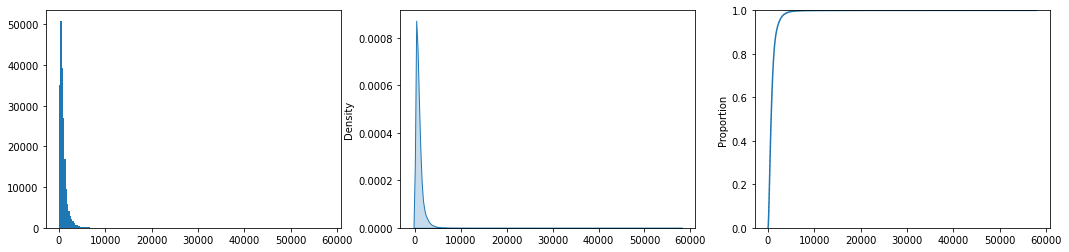

In [33]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.hist(text_length, bins=200)
plt.subplot(1,3,2)
sns.kdeplot(text_length.values, shade=True)
plt.subplot(1,3,3)
sns.ecdfplot(text_length.values)
plt.show()

### 词频统计

In [37]:
all_text = ' '.join(train_set['text'].tolist())

In [38]:
from collections import Counter
word_count = Counter(all_text.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)
word_count = pd.DataFrame(word_count)

In [64]:
word_count.loc[:,1].values

array([7482224, 4924890, 3262544, ...,       1,       1,       1],
      dtype=int64)

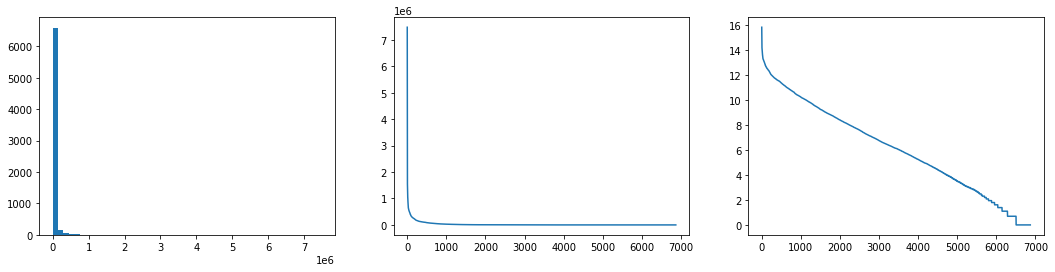

In [68]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.hist(word_count.loc[:,1].values, bins=50)
plt.subplot(1,3,2)
word_count.loc[:,1].plot()
plt.subplot(1,3,3)
word_count.loc[:,1].apply(np.log).plot()
plt.show()

### 类别分布

<AxesSubplot:>

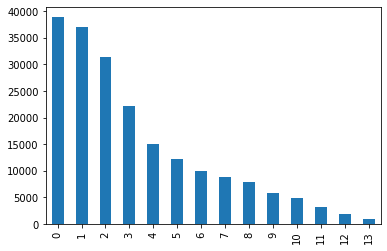

In [75]:
train_set['label'].value_counts().plot(kind='bar')

## 预处理

In [19]:
train_set['length'].nsmallest(int(0.1*train_set.shape[0]))

11863       2
196790      7
78312       9
67737      10
182153     10
         ... 
108871    202
111975    202
114264    202
115312    202
117218    202
Name: length, Length: 20000, dtype: int64